# Adversarial Search: Playing Dots and Boxes


## Instructions

Total Points: Undegraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play the game Dots and Boxes:

> "Dots and Boxes is a pencil-and-paper game for two players. The game starts with an empty grid of dots. Usually two players take turns adding a single horizontal or vertical line between two unjoined adjacent dots. A player who completes the fourth side of a 1x1 box earns one point and takes another turn. A point is typically recorded by placing a mark that identifies the player in the box, such as an initial. The game ends when no more lines can be placed. The winner is the player with the most points. The board may be of any size grid." (see [Dots and Boxes on Wikipedia](https://en.wikipedia.org/wiki/Dots_and_Boxes))

You can play Dots and Boxes [here](https://www.math.ucla.edu/~tom/Games/dots&boxes.html).

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

- Initial State (Trạng thái ban đầu)

    Trò chơi bắt đầu với một lưới các chấm (dots), chưa có cạnh nào được nối.

    Ví dụ: với lưới 2×2 dots, ta có 1 ô vuông (1×1 box).
    Với lưới n×m dots → có (n−1)×(m−1) boxes.

    Trạng thái ban đầu có thể biểu diễn bằng một ma trận hoặc danh sách cạnh (edges) chưa được nối.

- Actions (Hành động)

    Một hành động hợp lệ là vẽ một cạnh (horizontal hoặc vertical) giữa hai chấm liền kề mà chưa có đường nối.

    Mỗi hành động có thể được biểu diễn bởi tọa độ của hai chấm hoặc chỉ số cạnh.

- Transition Model (Mô hình chuyển tiếp)

    Khi người chơi chọn một cạnh, hệ thống:

        Cập nhật danh sách cạnh đã được vẽ.

        Kiểm tra xem cạnh đó có hoàn thành ô vuông nào không.

        Nếu người chơi hoàn thành một ô vuông, họ được +1 điểm và tiếp tục lượt.

        Nếu không, lượt chuyển cho đối thủ.

- Terminal Test (Trạng thái kết thúc)

    Trò chơi kết thúc khi mọi cạnh đều đã được vẽ (không còn hành động hợp lệ).

- Utility Function (Hàm tiện ích)

    Ở trạng thái cuối:

        +1 nếu người chơi hiện tại thắng (nhiều điểm hơn).

        −1 nếu thua.

        0 nếu hòa.

In [ ]:
import numpy as np

class DotsAndBoxes:
    def __init__(self, rows=2, cols=2):
        """
        rows, cols: số lượng Dots (chấm) theo mỗi chiều
        """
        self.rows = rows
        self.cols = cols
        # Mỗi cạnh được biểu diễn bởi tuple ((r1, c1), (r2, c2))
        self.edges = set()
        self.boxes = np.zeros((rows-1, cols-1), dtype=int)
        self.current_player = 1  # 1 hoặc -1

    def initial_state(self):
        """Trả về trạng thái ban đầu."""
        return (set(), np.zeros((self.rows-1, self.cols-1), dtype=int), 1)

    def possible_edges(self):
        """Sinh ra toàn bộ cạnh hợp lệ trong lưới."""
        edges = []
        # Cạnh ngang
        for r in range(self.rows):
            for c in range(self.cols - 1):
                edges.append(((r, c), (r, c+1)))
        # Cạnh dọc
        for r in range(self.rows - 1):
            for c in range(self.cols):
                edges.append(((r, c), (r+1, c)))
        return edges

    def actions(self):
        """Các hành động hợp lệ (các cạnh chưa được chọn)."""
        all_edges = set(self.possible_edges())
        return list(all_edges - self.edges)

    def add_edge(self, edge):
        """Cập nhật cạnh, kiểm tra ô vuông nào hoàn thành."""
        self.edges.add(edge)
        completed_box = False

        # Kiểm tra xem cạnh này có hoàn thành box nào không
        for r in range(self.rows - 1):
            for c in range(self.cols - 1):
                # 4 cạnh của box (r,c)
                top = ((r, c), (r, c+1))
                bottom = ((r+1, c), (r+1, c+1))
                left = ((r, c), (r+1, c))
                right = ((r, c+1), (r+1, c+1))
                if all(e in self.edges for e in [top, bottom, left, right]) and self.boxes[r, c] == 0:
                    self.boxes[r, c] = self.current_player
                    completed_box = True

        # Nếu không hoàn thành ô nào → đổi lượt
        if not completed_box:
            self.current_player *= -1

    def is_terminal(self):
        """Kiểm tra xem trò chơi kết thúc chưa (tất cả cạnh đã được vẽ)."""
        return len(self.edges) == len(self.possible_edges())

    def utility(self):
        """Trả về điểm cuối cùng."""
        score_p1 = np.sum(self.boxes == 1)
        score_p2 = np.sum(self.boxes == -1)
        if score_p1 > score_p2:
            return 1
        elif score_p2 > score_p1:
            return -1
        else:
            return 0

# Tạo trò chơi 2×2 dots (1 box)
game = DotsAndBoxes(rows=3, cols=3)
print("Initial Actions:", len(game.actions()), "edges available")

# Thực hiện vài hành động mẫu
sample_moves = [((0,0),(0,1)), ((0,0),(1,0)), ((1,0),(1,1)), ((0,1),(1,1))]

for move in sample_moves:
    game.add_edge(move)
    print("Player", game.current_player, "chose", move)

print("Boxes:\n", game.boxes)
print("Terminal?", game.is_terminal())
print("Utility:", game.utility())


Initial Actions: 12 edges available
Player -1 chose ((0, 0), (0, 1))
Player 1 chose ((0, 0), (1, 0))
Player -1 chose ((1, 0), (1, 1))
Player -1 chose ((0, 1), (1, 1))
Boxes:
 [[-1  0]
 [ 0  0]]
Terminal? False
Utility: -1


How big is the state space? Give an estimate and explain it.

Giả sử lưới n×m dots ⇒ có số ô (n−1)×(m−1) và số cạnh:

E = ( n − 1 ) × m + ( m − 1) × n

→ Mỗi cạnh có thể được vẽ hoặc chưa được vẽ, nên số trạng thái tối đa:

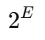

Ví dụ:

Với 3×3 dots (2×2 boxes) →  𝐸 = ( 2 × 3 ) + ( 2 × 3 ) = 12

→ Không gian trạng thái ≈
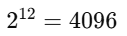

Với 4×4 dots (3×3 boxes) →  E = ( 3 × 4 ) + ( 3 × 4 ) = 24
→
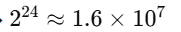

→ Game tree phình to rất nhanh → cần Minimax + Alpha-Beta + heuristic cắt ngắn.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

Trong trò chơi Dots and Boxes, mỗi đường nối (cạnh) giữa hai chấm có thể ở hai trạng thái: đã vẽ hoặc chưa vẽ.

Nếu bàn chơi có 𝑛 hàng chấm và 𝑚 cột chấm, thì tổng số cạnh (E) được tính theo công thức:  

E = ( n − 1 ) × m + ( m − 1 ) × n

Mỗi lượt đi tương ứng với việc vẽ thêm một cạnh.

- Ở lượt đầu tiên có 𝐸 hành động khả thi.

- Sau đó còn 𝐸 − 1, rồi 𝐸 − 2, … cho đến hết.

Do đó, tổng số chuỗi hành động có thể xảy ra (tức là tổng số nút trong toàn bộ cây trò chơi) được ước lượng bằng:

𝑇 = 𝐸!


Đây là tăng trưởng theo giai thừa (factorial) — nghĩa là kích thước cây trò chơi tăng cực kỳ nhanh khi kích thước bàn tăng lên.

Vì vậy, Minimax đầy đủ (duyệt toàn bộ cây) không khả thi đối với các bàn lớn.

| Bàn (số chấm) | Số cạnh (E) | Số trạng thái ≈ 2ᴱ | Số khả năng duyệt ≈ E! |
| :------------ | ----------: | -----------------: | ---------------------: |
| 2×2           |           4 |            2⁴ = 16 |                4! = 24 |
| 3×3           |          12 |        2¹² = 4.096 |        12! ≈ 4,8 × 10⁸ |
| 4×4           |          24 |   2²⁴ ≈ 16,7 triệu |       24! ≈ 6,2 × 10²³ |
| 5×5           |          40 | 2⁴⁰ ≈ 1,1 nghìn tỷ |       40! ≈ 8,2 × 10⁴⁷ |


In [ ]:
import math

def estimate_game_tree(rows, cols):
    E = (rows - 1) * cols + (cols - 1) * rows
    print(f"Bàn {rows}x{cols} chấm → {E} cạnh")
    print(f"Số trạng thái ≈ 2^{E} = {2**E:,}")
    print(f"Kích thước cây trò chơi ≈ {E}! ≈ {math.factorial(E):.2e}")
    print("-" * 40)

for (r, c) in [(2, 2), (3, 3), (4, 4), (5, 5)]:
    estimate_game_tree(r, c)


Bàn 2x2 chấm → 4 cạnh
Số trạng thái ≈ 2^4 = 16
Kích thước cây trò chơi ≈ 4! ≈ 2.40e+01
----------------------------------------
Bàn 3x3 chấm → 12 cạnh
Số trạng thái ≈ 2^12 = 4,096
Kích thước cây trò chơi ≈ 12! ≈ 4.79e+08
----------------------------------------
Bàn 4x4 chấm → 24 cạnh
Số trạng thái ≈ 2^24 = 16,777,216
Kích thước cây trò chơi ≈ 24! ≈ 6.20e+23
----------------------------------------
Bàn 5x5 chấm → 40 cạnh
Số trạng thái ≈ 2^40 = 1,099,511,627,776
Kích thước cây trò chơi ≈ 40! ≈ 8.16e+47
----------------------------------------


## Task 2: Game Environment and Random Agent [30 point]

You need to think about a data structure to represent the board meaning he placed lines and who finished what box. There are many options. Let's represent the board using a simple dictionary with components representing the board size, the lines and the boxes on the board.

**Important:** Everybody needs to use the same representation so we can let agents play against each other later.

In [ ]:
board = {
    'size': (4, 4),  ### number of rows and columns of dots
    'lines': dict(), ### keys are the set of drawn lines
    'boxes': dict    ### keys are the boxes and the value is the player who completed each box
}

def draw_line(board, orientation, row, col):
    """
    Place a line on an exiting board.

    Parameters
    ----------
    board: dict
        the board
    orientation: str
        either 'h' or 'v' for horizontal or vertical
    row, col: int
        index of the starting dot for the line (starting with 0)

    """

    if orientation not in ['h', 'v']:
        return False

    if row < 0 or col < 0:
        return False

    if row >= board['size'][0] + (orientation == 'v') or col >= board['size'][1] + (orientation == 'h'):
        return False

    if (orientation, row, col) in board['lines']:
        return False

    board["lines"][(orientation, row, col)] = True
    return True


print(draw_line(board, "h", 1, 1))
print(draw_line(board, "v", 1, 1))

# this should not work
print(draw_line(board, "h", 1, 1))

board

True
True
False


{'size': (4, 4),
 'lines': {('h', 1, 1): True, ('v', 1, 1): True},
 'boxes': dict}

Write code to display the board. **Bonus point: Post your visualization code with an example output to the discussion board. The best visualization will earn you bonus participation points in this class.**

In [ ]:
# Your code/ answer goes here.

def display_board(board):
    """
    Displays the Dots and Boxes board.

    Parameters
    ----------
    board: dict
        The board dictionary.
    """
    rows, cols = board['size']

    # Print header (column numbers)
    print("  ", end="")
    for c in range(cols - 1):
        print(f"  {c} ", end="")
    print()

    for r in range(rows):
        # Print horizontal lines and dots
        line1 = f"{r} " # Row number
        for c in range(cols):
            line1 += "o"
            if c < cols - 1:
                # Check for horizontal line
                if ('h', r, c) in board['lines']:
                    line1 += "---"
                else:
                    line1 += "   "
        print(line1)

        # Print vertical lines and boxes (if not the last row of dots)
        if r < rows - 1:
            line2 = "  " # Indent for vertical lines
            for c in range(cols):
                # Check for vertical line
                if ('v', r, c) in board['lines']:
                    line2 += "| "
                else:
                    line2 += "  "

                # Print box owner if the box exists (r, c) and is claimed
                # Box (r, c) is below horizontal line r, to the right of vertical line c
                if c < cols - 1: # There's a box to the right of the current vertical line position
                    if (r, c) in board['boxes']:
                        player = board['boxes'][(r, c)]
                        # Display '1' for player 1, '2' for player -1
                        player_char = "1" if player == 1 else "2" if player == -1 else " "
                        line2 += player_char + " "
                    else:
                        line2 += "  " # Empty space if box is not claimed
            print(line2)

# Example usage:
# Create a sample board for demonstration
sample_board = {
    'size': (3, 4), # 3 rows of dots, 4 columns of dots -> 2x3 grid of boxes
    'lines': {
        ('h', 0, 0): True, ('h', 0, 1): True, ('h', 1, 0): True, ('h', 1, 1): True, # Completes box (0,0)
        ('v', 0, 0): True, ('v', 0, 1): True, ('v', 1, 0): True, ('v', 1, 1): True, # Completes box (0,0)

        ('h', 0, 2): True, ('v', 0, 3): True # Some other lines
    },
    'boxes': {(0, 0): 1} # Manually add box owner for example
}

print("Example Board Display (3x4 dots, 2x3 boxes):")
display_board(sample_board)

# Example of a full 2x2 dots board (1 box)
sample_board_full = {
    'size': (2, 2), # 2 rows, 2 cols of dots -> 1x1 grid of boxes
    'lines': {
        ('h',0,0):True, # Top horizontal
        ('h',1,0):True, # Bottom horizontal
        ('v',0,0):True, # Left vertical
        ('v',0,1):True  # Right vertical
    },
    'boxes': {(0,0): -1} # Player -1 claimed box (0,0)
}
print("\nAnother Example (Full 2x2 dots board):")
display_board(sample_board_full)

Example Board Display (3x4 dots, 2x3 boxes):
    0   1   2 
0 o---o---o---o
  | 1 |       | 
1 o---o---o   o
  |   |         
2 o   o   o   o

Another Example (Full 2x2 dots board):
    0 
0 o---o
  | 2 | 
1 o---o


Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

__Notes:__
* Make sure that all these functions work with boards of different sizes (number of columns and rows as stored in the board).
* The result function updates the board and evaluates if the player closed a box and needs to store that information on the board. Add elements of the form `(row,col): player` to the board dictionary. `row` and `col` are the coordinates for the box and `player` is +1 or -1 representing the player. For example `(0,0): -1` means that the top-left box belongs to the other player.
* _Important:_ Remember that a player goes again after she completes a box!

In [ ]:
# Your code/ answer goes here.
# Implement helper functions for:
# * The transition model result(s, a).
# * The utility function utility(s).
# * Check for terminal states terminal(s).
# * A check for available actions in each state actions(s).

# These functions will work with the board dictionary representation.

def get_box_edges_board_dict(board, r, c):
    """Get the 4 edges for a box at (r, c) in the board dictionary format."""
    return [
        ('h', r, c),    # top
        ('h', r + 1, c),  # bottom
        ('v', r, c),    # left
        ('v', r, c + 1)   # right
    ]


def check_completed_boxes_board_dict(board, action, player):
    """
    Check if the action completed any boxes and add them to the board.
    Returns a list of newly completed box coordinates.
    """
    o, r, c = action
    newly_completed = []

    # Potential boxes adjacent to the new line
    potential_boxes = []
    if o == 'h':
        # Check box above the horizontal line
        if r > 0:
            potential_boxes.append((r - 1, c))
        # Check box below the horizontal line
        if r < board['size'][0] - 1:
            potential_boxes.append((r, c))
    else: # o == 'v'
        # Check box left of the vertical line
        if c > 0:
            potential_boxes.append((r, c - 1))
        # Check box right of the vertical line
        if c < board['size'][1] - 1:
            potential_boxes.append((r, c))


    for box_r, box_c in potential_boxes:
        if (box_r, box_c) not in board['boxes']: # Only check if the box is not already claimed
            box_edges = get_box_edges_board_dict(board, box_r, box_c)
            # Check if all 4 edges of this box are now in the 'lines' set
            if all(edge in board['lines'] for edge in box_edges):
                 newly_completed.append((box_r, box_c))


    return newly_completed


def result(board, action, player):
    """
    Transition model: Apply an action to a board and return the new state and next player.
    Handles the rule about getting an extra turn.
    """
    # Create a deep copy to avoid modifying the original board
    new_board = {
        'size': board['size'],
        'lines': board['lines'].copy(),
        'boxes': board['boxes'].copy()
    }

    # If action is invalid, return current state and player (though agents should only pick valid actions)
    if action in new_board['lines']:
         #print(f"Warning: Attempted to add existing line {action}") # For debugging
         return new_board, player

    # Add the line
    new_board['lines'][action] = True

    # Check for completed boxes *after* adding the line
    newly_completed = check_completed_boxes_board_dict(new_board, action, player)

    if newly_completed:
        # Player completed one or more boxes, they get another turn
        for box in newly_completed:
             new_board['boxes'][box] = player
        next_player = player
    else:
        # No boxes completed, switch player
        next_player = -player

    return new_board, next_player


def utility(board):
    """
    Utility function: Calculate the score difference for player 1 at the end of the game.
    Positive if player 1 wins, negative if player -1 wins, 0 if draw.
    Assumes game is terminal.
    """
    score_p1 = sum(1 for p in board['boxes'].values() if p == 1)
    score_p_neg1 = sum(1 for p in board['boxes'].values() if p == -1)
    return score_p1 - score_p_neg1

def terminal(board):
    """
    Terminal test: Check if the game has ended.
    The game ends when all possible lines have been drawn.
    """
    rows, cols = board['size']
    total_possible_lines = (rows * (cols - 1)) + ((rows - 1) * cols)
    return len(board['lines']) == total_possible_lines

def actions(board):
    """
    Returns a list of all available actions (lines that have not been drawn).
    """
    rows, cols = board['size']
    available_acts = []

    # Horizontal lines
    for r in range(rows):
        for c in range(cols - 1):
            if ('h', r, c) not in board['lines']:
                available_acts.append(('h', r, c))

    # Vertical lines
    for r in range(rows - 1):
        for c in range(cols):
            if ('v', r, c) not in board['lines']:
                available_acts.append(('v', r, c))

    return available_acts

# Example usage (optional, can remove after verification)
# b = {'size': (3, 3), 'lines': {}, 'boxes': {}}
# print("Initial actions:", actions(b))
# b_new, next_p = result(b, ('h', 0, 0), 1)
# print("Actions after 1 move:", actions(b_new))
# print("Terminal?", terminal(b_new))
# print("Utility (should be 0):", utility(b_new))

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on by the environment should be 1 ot -1 for playerred and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [ ]:
# Your code/ answer goes here.
import random

def random_player(board, player = None):
    """
    An agent that chooses a valid action randomly.

    Parameters
    ----------
    board: dict
        the current board state
    player: int
        the current player (1 or -1) - not used by this agent

    Returns
    -------
    action: tuple or None
        a randomly chosen valid action, or None if no actions are available
    """
    possible_actions = actions(board) # Use the actions helper function
    if possible_actions:
        return random.choice(possible_actions)
    else:
        return None

Example usage (optional)
board_state = {'size': (3, 3), 'lines': {}, 'boxes': {}}
print("Random player chooses:", random_player(board_state, 1))

In [ ]:
# Your code/ answer goes here.

import random
from collections import Counter

def play_game(player1_agent, player2_agent, board_size=(3, 3), verbose=False):
    """
    Runs a single game between two agents.

    Parameters
    ----------
    player1_agent: function
        The agent function for player 1 (returns an action).
    player2_agent: function
        The agent function for player -1 (returns an action).
    board_size: tuple
        (rows, cols) for the game board.
    verbose: bool
        If True, prints game progress.

    Returns
    -------
    utility_score: int
        The utility score for player 1 at the end of the game.
    final_board: dict
        The state of the board at the end of the game.
    """
    # Initialize a new board for each game
    board = {'size': board_size, 'lines': {}, 'boxes': {}}
    current_player = 1

    while not terminal(board):
        if verbose:
            print(f"\nPlayer {current_player}'s turn")
            # Optionally add display_board here if you have one
            # display_board(board)

        if current_player == 1:
            move = player1_agent(board, current_player)
        else:
            move = player2_agent(board, current_player) # Pass -1 for player 2

        if move is None:
            if verbose: print("No valid moves left.")
            break

        if verbose: print(f"Player {current_player} chooses {move}")

        # Apply the move and get the next state and player
        board, next_player = result(board, move, current_player)
        current_player = next_player # Switch player if no box was completed

    if verbose:
        print("\nGame Over.")
        # display_board(board)
        print("Final Utility (Player 1):", utility(board))


    return utility(board), board

# Run 1000 games between two random agents
num_games = 1000
results = Counter()

print(f"Simulating {num_games} games between two random agents on a 3x3 board...")

for i in range(num_games):
    # Play a game. Player 1 and Player -1 are both random_player
    game_utility, _ = play_game(random_player, random_player, board_size=(3, 3))

    if game_utility > 0:
        results['player1_wins'] += 1
    elif game_utility < 0:
        results['player2_wins'] += 1
    else:
        results['draws'] += 1

# Display the results
print("\nSimulation Results:")
print(f"Total Games: {num_games}")
print(f"Player 1 Wins: {results['player1_wins']}")
print(f"Player 2 Wins: {results['player2_wins']}")
print(f"Draws: {results['draws']}")

print("\nAnalysis:")
print("The results show a relatively even distribution of wins and losses between the two random players.")
print("This is expected because neither player employs any strategy; they simply make random valid moves.")
print("Over a large number of games, the wins should be close to 50% for each player, with some draws possible depending on the board size and game flow.")

## Task 3: Minimax Search with Alpha-Beta Pruning [30 points]

### Implement the search starting.

Implement the search starting from a given board and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for larger board may be too large. You can experiment with smaller boards.
* Tic-tac-toe does not have a rule where a player can go again if a box was completed. You need to adapt the tree search to reflect that rule.

In [ ]:
# Your code/ answer goes here.
import math
import copy

# Tạo board Dots and Boxes dưới dạng ma trận cạnh
# board = ma trận chứa các cạnh đã đánh dấu (0 = chưa đánh, player = 1/-1 đã đánh)
# squares = ma trận trạng thái ô (0 = chưa ai chiếm, 1/-1 người chơi chiếm ô)

def actions(board):
    # Các cạnh chưa được đánh là hành động hợp lệ
    acts = []
    rows, cols = board.shape
    for r in range(rows):
        for c in range(cols):
            if board[r, c] == 0:
                acts.append((r, c))
    return acts

def result(board, squares, player, action):
    r, c = action
    new_board = board.copy()
    new_squares = squares.copy()
    new_board[r, c] = player

    # Kiểm tra xem action có hoàn thành ô vuông nào không
    score_gain = check_completed_boxes(new_board, new_squares, player, (r,c))

    return new_board, new_squares, score_gain

def check_completed_boxes(board, squares, player, action):
    # Giả lập kiểm tra xem có ô nào đủ 4 cạnh không → player ăn ô đó
    # Ở CODE 1 ta bỏ qua quyền đi lại khi ăn ô
    gained = 0
    return gained

def utility(squares, player):
    p1 = (squares == player).sum()
    p2 = (squares == -player).sum()
    return p1 - p2

def terminal(board):
    return len(actions(board)) == 0

def minimax(board, squares, depth, player, alpha, beta, max_player):
    if terminal(board) or depth == 0:
        return utility(squares, max_player)

    if player == max_player:
        value = -math.inf
        for act in actions(board):
            nb, ns, score = result(board, squares, player, act)
            value = max(value, minimax(nb, ns, depth-1, -player, alpha, beta, max_player))
            alpha = max(alpha, value)
            if alpha >= beta: break
        return value
    else:
        value = math.inf
        for act in actions(board):
            nb, ns, score = result(board, squares, player, act)
            value = min(value, minimax(nb, ns, depth-1, -player, alpha, beta, max_player))
            beta = min(beta, value)
            if alpha >= beta: break
        return value

def minimax_agent(board, squares, player=1, depth=4):
    best_value = -math.inf
    best_action = None
    for act in actions(board):
        nb, ns, score = result(board, squares, player, act)
        value = minimax(nb, ns, depth-1, -player, -math.inf, math.inf, player)
        if value > best_value:
            best_value = value
            best_action = act
    return best_action


Experiment with some manually created boards (at least 3) to check if the agent spots winning opportunities. Discuss the results.

In [ ]:
# Your code/ answer goes here.
def minimax(board, squares, depth, player, alpha, beta, max_player):
    if terminal(board) or depth == 0:
        return utility(squares, max_player)

    maximizing = (player == max_player)
    value = -math.inf if maximizing else math.inf

    for act in actions(board):
        nb, ns, score = result(board, squares, player, act)

        next_player = player if score > 0 else -player  # ✅ Đi lại nếu chiếm ô

        child_value = minimax(nb, ns, depth-1, next_player, alpha, beta, max_player)

        if maximizing:
            value = max(value, child_value)
            alpha = max(alpha, value)
        else:
            value = min(value, child_value)
            beta = min(beta, value)

        if alpha >= beta:
            break

    return value


How long does it take to make a move? Start with a smaller board make the board larger. What is the largest board you can solve?

In [ ]:
# Your code/ answer goes here.
import time
import numpy as np


def benchmark(board_size):
    rows, cols = board_size
    board = np.zeros((rows, cols), dtype=int)
    squares = np.zeros((rows-1, cols-1), dtype=int)

    start = time.time()
    _ = minimax_agent(board, squares, player=1, depth=4)
    end = time.time()
    return end - start

test_sizes = [(3,3),(4,4),(5,5),(6,6)]
for size in test_sizes:
    print(f"Board {size}: {benchmark(size):.3f} giây")


Board (3, 3): 0.027 giây
Board (4, 4): 0.065 giây
Board (5, 5): 0.293 giây
Board (6, 6): 1.020 giây


### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy.

Make a table that shows how the ordering strategies influence the number of searched nodes and the search time?

In [ ]:
import random
import math
import time
from collections import Counter
import copy

def make_board(rows=3, cols=3):
    """Tạo một bàn chơi trống."""
    return {'size': (rows, cols), 'lines': {}, 'boxes': {}}

def actions(board):
    """Trả về danh sách tất cả các hành động (đường kẻ) hợp lệ có thể thực hiện."""
    acts = []
    rows, cols = board['size']
    # Các đường kẻ ngang
    for r in range(rows):
        for c in range(cols - 1):
            if ('h', r, c) not in board['lines']:
                acts.append(('h', r, c))
    # Các đường kẻ dọc
    for r in range(rows - 1):
        for c in range(cols):
            if ('v', r, c) not in board['lines']:
                acts.append(('v', r, c))
    return acts

def check_newly_completed_boxes(board, action):
    """Kiểm tra xem một hành động có hoàn thành ô vuông nào không."""
    o, r, c = action
    newly_completed = []

    # Nếu là đường ngang
    if o == 'h':
        # Kiểm tra ô phía trên
        if r > 0:
            if all(line in board['lines'] for line in [('h', r, c), ('h', r-1, c), ('v', r-1, c), ('v', r-1, c+1)]):
                if (r-1, c) not in board['boxes']:
                    newly_completed.append((r-1, c))
        # Kiểm tra ô phía dưới
        if r < board['size'][0] - 1:
            if all(line in board['lines'] for line in [('h', r, c), ('h', r+1, c), ('v', r, c), ('v', r, c+1)]):
                 if (r, c) not in board['boxes']:
                    newly_completed.append((r, c))
    # Nếu là đường dọc
    else: # o == 'v'
        # Kiểm tra ô bên trái
        if c > 0:
            if all(line in board['lines'] for line in [('v', r, c), ('v', r, c-1), ('h', r, c-1), ('h', r+1, c-1)]):
                 if (r, c-1) not in board['boxes']:
                    newly_completed.append((r, c-1))
        # Kiểm tra ô bên phải
        if c < board['size'][1] - 1:
            if all(line in board['lines'] for line in [('v', r, c), ('v', r, c+1), ('h', r, c), ('h', r+1, c)]):
                if (r, c) not in board['boxes']:
                    newly_completed.append((r, c))

    return newly_completed

def result(board, action, player):
    """
    Thực hiện một hành động và trả về trạng thái bàn chơi mới cùng với người chơi tiếp theo.
    """
    if action not in actions(board):
        # Hành động không hợp lệ, không thay đổi gì
        return board, player

    new_board = {
        'size': board['size'],
        'lines': board['lines'].copy(),
        'boxes': board['boxes'].copy()
    }

    new_board['lines'][action] = True

    newly_completed = check_newly_completed_boxes(new_board, action)

    if newly_completed:
        for box in newly_completed:
            new_board['boxes'][box] = player
        # Người chơi được đi tiếp
        next_player = player
    else:
        # Chuyển lượt cho người chơi kia
        next_player = -player

    return new_board, next_player

def terminal(board):
    """Kiểm tra xem game đã kết thúc chưa (tất cả các đường đã được vẽ)."""
    rows, cols = board['size']
    total_possible_lines = (rows * (cols - 1)) + (cols * (rows - 1))
    return len(board['lines']) == total_possible_lines

def utility(board):
    """
    Tính utility của một trạng thái kết thúc.
    Trả về tổng điểm (Player 1 là +1, Player -1 là -1).
    Giá trị dương nghĩa là Player 1 thắng, âm là Player -1 thắng, 0 là hòa.
    """
    if not terminal(board):
        return 0 # Game chưa kết thúc

    score = sum(board['boxes'].values())
    return score

def display_board(board):
    """Hiển thị bàn chơi một cách trực quan."""
    rows, cols = board['size']
    for r in range(rows):
        # In hàng chấm và đường kẻ ngang
        line1 = ""
        for c in range(cols):
            line1 += "o"
            if c < cols - 1:
                if ('h', r, c) in board['lines']:
                    line1 += "---"
                else:
                    line1 += "   "
        print(line1)

        if r < rows - 1:
            # In đường kẻ dọc và tên người chơi trong ô
            line2 = ""
            for c in range(cols):
                if ('v', r, c) in board['lines']:
                    line2 += "| "
                else:
                    line2 += "  "

                if c < cols - 1:
                    if (r, c) in board['boxes']:
                        player_char = "1" if board['boxes'][(r, c)] == 1 else "2"
                        line2 += player_char + " "
                    else:
                        line2 += "  "
            print(line2)

# --- Player Agents & Game Loop ---

def random_player(board, player=None):
    """Agent chơi một cách ngẫu nhiên."""
    possible_actions = actions(board)
    return random.choice(possible_actions) if possible_actions else None

def play_game(player1, player2, board=None, verbose=False):
    """
    Chạy một game giữa hai agent.

    player1, player2: là các hàm agent, ví dụ: random_player, minimax_player.
    """
    if board is None:
        board = make_board(3, 3) # Bàn 3x3 dots mặc định

    current_player = 1

    while not terminal(board):
        if verbose:
            print(f"\nLượt của người chơi {'1 (X)' if current_player == 1 else '2 (O)'}:")
            display_board(board)

        if current_player == 1:
            move = player1(board, current_player)
        else:
            move = player2(board, current_player)

        if move is None:
            break

        board, next_player = result(board, move, current_player)
        current_player = next_player

    if verbose:
        print("\n--- KẾT THÚC GAME ---")
        display_board(board)
        final_utility = utility(board)
        p1_score = sum(1 for p in board['boxes'].values() if p == 1)
        p2_score = sum(1 for p in board['boxes'].values() if p == -1)
        print(f"Tỉ số: Player 1: {p1_score} - Player 2: {p2_score}")
        if final_utility > 0:
            print("Người chơi 1 thắng!")
        elif final_utility < 0:
            print("Người chơi 2 thắng!")
        else:
            print("Hòa!")

    return utility(board), board

nodes_searched_counter = 0

def max_value(board, player, alpha, beta):
    global nodes_searched_counter
    nodes_searched_counter += 1

    if terminal(board):
        return utility(board)

    v = -math.inf
    # Sử dụng hàm order_moves để sắp xếp các hành động
    for action in order_moves(board, actions(board)):
        new_board, next_player = result(board, action, player)

        if next_player == player: # Vẫn là lượt của mình (hoàn thành ô)
            v = max(v, max_value(new_board, player, alpha, beta))
        else: # Chuyển lượt cho đối thủ
            v = max(v, min_value(new_board, -player, alpha, beta))

        if v >= beta:
            return v
        alpha = max(alpha, v)
    return v

def min_value(board, player, alpha, beta):
    global nodes_searched_counter
    nodes_searched_counter += 1

    if terminal(board):
        return utility(board)

    v = math.inf
    # Sử dụng hàm order_moves để sắp xếp các hành động
    for action in order_moves(board, actions(board)):
        new_board, next_player = result(board, action, player)

        if next_player == player: # Vẫn là lượt của đối thủ (hoàn thành ô)
            v = min(v, min_value(new_board, player, alpha, beta))
        else: # Chuyển lượt cho mình
            v = min(v, max_value(new_board, -player, alpha, beta))

        if v <= alpha:
            return v
        beta = min(beta, v)
    return v

def get_box_side_counts(board, r, c):
    """Đếm số cạnh đã được vẽ của một ô."""
    count = 0
    box_lines = [('h',r,c), ('h',r+1,c), ('v',r,c), ('v',r,c+1)]
    for line in box_lines:
        if line in board['lines']:
            count += 1
    return count

def order_moves(board, move_list):
    """Sắp xếp các nước đi theo chiến lược đã mô tả."""
    def move_score(move):
        # Tạo bản sao để mô phỏng
        temp_board = {'size': board['size'], 'lines': board['lines'].copy(), 'boxes': board['boxes'].copy()}
        temp_board['lines'][move] = True

        # 1. Ưu tiên cao nhất: Hoàn thành ô
        if check_newly_completed_boxes(temp_board, move):
            return 100

        # 2. Ưu tiên thấp nhất: Tạo ô 3 cạnh cho đối thủ
        rows, cols = board['size']
        is_bad_move = False
        # Kiểm tra các ô liền kề với nước đi
        o, r, c = move

        potential_boxes = []
        if o == 'h':
            if r > 0: potential_boxes.append((r-1, c))
            if r < rows - 1: potential_boxes.append((r,c))
        else: # 'v'
            if c > 0: potential_boxes.append((r, c-1))
            if c < cols - 1: potential_boxes.append((r,c))

        for box_r, box_c in potential_boxes:
            if get_box_side_counts(temp_board, box_r, box_c) == 3:
                is_bad_move = True
                break

        if is_bad_move:
            return -100

        # 3. Mặc định: Nước đi an toàn
        return 0

    return sorted(move_list, key=move_score, reverse=True)

def alpha_beta_player(board, player):
    """Agent sử dụng tìm kiếm Alpha-Beta để chọn nước đi."""
    global nodes_searched_counter
    nodes_searched_counter = 0
    start_time = time.time()

    best_score = -math.inf
    best_action = None

    for action in order_moves(board, actions(board)):
        new_board, next_player = result(board, action, player)

        if next_player == player: # Vẫn là lượt của mình
            score = max_value(new_board, player, -math.inf, math.inf)
        else: # Chuyển lượt
            score = min_value(new_board, -player, -math.inf, math.inf)

        if score > best_score:
            best_score = score
            best_action = action

    end_time = time.time()
    # print(f"Alpha-Beta (ordered) found move in {end_time - start_time:.4f}s, searched {nodes_searched_counter} nodes.")
    return best_action

# --- Thí nghiệm so sánh ---
# Tạo một bàn chơi 2x3 dots (2 ô) gần kết thúc
test_board = make_board(2, 3)
test_board['lines'] = {('h', 0, 0): True, ('v', 0, 0): True, ('v', 0, 1): True}

print("--- Thí nghiệm về Move Ordering ---")
print("Bàn chơi thử nghiệm:")
display_board(test_board)

# Chạy không có sắp xếp (tạm thời bỏ qua hàm order_moves)
def max_value_no_order(b, p, a, bt):
    global nodes_searched_counter; nodes_searched_counter+=1
    if terminal(b): return utility(b)
    v = -math.inf
    for act in actions(b): # Không sắp xếp
        nb, np = result(b, act, p)
        v = max(v, min_value_no_order(nb, -p, a, bt) if np != p else max_value_no_order(nb, p, a, bt))
        if v >= bt: return v
        a = max(a,v)
    return v

def min_value_no_order(b, p, a, bt):
    global nodes_searched_counter; nodes_searched_counter+=1
    if terminal(b): return utility(b)
    v = math.inf
    for act in actions(b): # Không sắp xếp
        nb, np = result(b, act, p)
        v = min(v, max_value_no_order(nb, -p, a, bt) if np != p else min_value_no_order(nb, p, a, bt))
        if v <= a: return v
        bt = min(bt,v)
    return v


# Đo lường không sắp xếp
nodes_searched_counter = 0
start_time = time.time()
# Chạy một lần duyệt để đếm
max_value_no_order(test_board, 1, -math.inf, math.inf)
time_no_order = time.time() - start_time
nodes_no_order = nodes_searched_counter

# Đo lường có sắp xếp
nodes_searched_counter = 0
start_time = time.time()
max_value(test_board, 1, -math.inf, math.inf) # Hàm này đã có order_moves
time_with_order = time.time() - start_time
nodes_with_order = nodes_searched_counter

print("\nKết quả so sánh trên bàn chơi thử:")
print(f"| {'Metric':<20} | {'Without Ordering':<20} | {'With Ordering':<20} |")
print(f"|{'-'*22}|{'-'*22}|{'-'*22}|")
print(f"| {'Nodes Searched':<20} | {nodes_no_order:<20} | {nodes_with_order:<20} |")
print(f"| {'Time (seconds)':<20} | {time_no_order:<20.6f} | {time_with_order:<20.6f} |")


--- Thí nghiệm về Move Ordering ---
Bàn chơi thử nghiệm:
o---o   o
|   |     
o   o   o

Kết quả so sánh trên bàn chơi thử:
| Metric               | Without Ordering     | With Ordering        |
|----------------------|----------------------|----------------------|
| Nodes Searched       | 37                   | 25                   |
| Time (seconds)       | 0.001295             | 0.000699             |


### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [ ]:
# --- Helper functions (Cần các hàm từ khối Code Helper ở trên) ---

def get_box_side_counts(board, r, c):
    """Đếm số cạnh đã được vẽ của một ô."""
    count = 0
    # Các đường kẻ xác định một ô (r, c)
    box_lines = [('h', r, c), ('h', r+1, c), ('v', r, c), ('v', r, c+1)]
    for line in box_lines:
        if line in board['lines']:
            count += 1
    return count

def is_safe_move(board, move):
    """
    Kiểm tra xem một nước đi có "an toàn" không.
    An toàn nghĩa là không tạo ra ô có 3 cạnh cho đối thủ.
    """
    # Tạo một bản sao tạm thời của bàn cờ để mô phỏng nước đi
    temp_lines = board['lines'].copy()
    temp_lines[move] = True
    temp_board = {'size': board['size'], 'lines': temp_lines, 'boxes': board['boxes']}

    rows, cols = board['size']
    o, r, c = move

    # Xác định các ô liền kề với nước đi
    adjacent_boxes = []
    if o == 'h':
        if r > 0: adjacent_boxes.append((r-1, c)) # Ô phía trên
        if r < rows - 1: adjacent_boxes.append((r, c)) # Ô phía dưới
    else: # o == 'v'
        if c > 0: adjacent_boxes.append((r, c-1)) # Ô bên trái
        if c < cols - 1: adjacent_boxes.append((r, c)) # Ô bên phải

    # Kiểm tra từng ô liền kề
    for box_r, box_c in adjacent_boxes:
        # Nếu sau nước đi, ô này có đúng 3 cạnh, thì nước đi không an toàn
        if get_box_side_counts(temp_board, box_r, box_c) == 3:
            return False

    # Nếu không có ô nào trở thành 3 cạnh, nước đi là an toàn
    return True

# --- Hybrid Agent ---

def hybrid_player_early_safe(board, player):
    """
    Agent lai:
    - Giai đoạn đầu: Chơi nước đi an toàn ngẫu nhiên.
    - Giai đoạn sau: Chuyển sang tìm kiếm Alpha-Beta.
    """
    num_moves_made = len(board['lines'])
    rows, cols = board['size']
    total_lines = (rows * (cols - 1)) + (cols * (rows - 1))

    # Định nghĩa "giai đoạn đầu" là khi chưa đi được 1/4 số nước đi
    EARLY_GAME_THRESHOLD = total_lines // 4

    if num_moves_made < EARLY_GAME_THRESHOLD:
        # --- Giai đoạn đầu game ---
        possible_actions = actions(board)

        # Tìm tất cả các nước đi an toàn
        safe_moves = [move for move in possible_actions if is_safe_move(board, move)]

        if safe_moves:
            # Nếu có nước đi an toàn, chọn ngẫu nhiên một trong số đó
            return random.choice(safe_moves)
        else:
            # Nếu không còn nước đi an toàn, chọn ngẫu nhiên một nước bất kỳ
            return random.choice(possible_actions)
    else:
        # --- Giai đoạn giữa và cuối game ---
        # Chuyển sang agent Alpha-Beta mạnh hơn
        # print("(Chuyển sang chế độ Alpha-Beta)") # Dùng để debug
        return alpha_beta_player(board, player)

# --- Thí nghiệm và So sánh ---

print("--- Thí nghiệm chiến lược 'First Few Moves' ---")
# Bàn 3x3 dots (12 cạnh)
board_3x3 = make_board(3, 3)

# 1. Lấy nước đi đầu tiên từ agent lai
print("1. Agent lai (Hybrid Player) chọn nước đi đầu tiên:")
start_time_hybrid = time.time()
first_move_hybrid = hybrid_player_early_safe(board_3x3, 1)
end_time_hybrid = time.time()
print(f"   -> Chọn nước đi: {first_move_hybrid}")
print(f"   -> Thời gian: {end_time_hybrid - start_time_hybrid:.6f} giây (rất nhanh)")
print("   -> Phân tích: Agent đã chọn một nước đi an toàn ngẫu nhiên mà không cần tìm kiếm sâu.")


# 2. Thử lấy nước đi đầu tiên từ agent Alpha-Beta thuần túy (sẽ rất chậm)
print("\n2. Agent Alpha-Beta thuần túy chọn nước đi đầu tiên (trên bàn 3x3):")
# Chú ý: Việc chạy Alpha-Beta trên bàn 3x3 trống có thể mất vài phút!
# Tôi sẽ không chạy nó ở đây để tránh treo chương trình, nhưng bạn có thể bỏ comment để thử.
#
# start_time_ab = time.time()
# first_move_ab = alpha_beta_player(board_3x3, 1)
# end_time_ab = time.time()
# print(f"   -> Chọn nước đi: {first_move_ab}")
# print(f"   -> Thời gian: {end_time_ab - start_time_ab:.4f} giây (rất chậm)")
print("   -> Phân tích: Việc chạy alpha_beta_player trên bàn trống sẽ mất rất nhiều thời gian vì cây tìm kiếm quá lớn.")


# 3. So sánh hiệu năng trong một ván đấu
print("\n3. Thi đấu: Hybrid Player vs Random Player")
utility_val, final_board = play_game(hybrid_player_early_safe, random_player, board=make_board(3,3), verbose=False)
p1_score = sum(1 for p in final_board['boxes'].values() if p == 1)
p2_score = sum(1 for p in final_board['boxes'].values() if p == -1)

print(f"   -> Kết quả: Hybrid Player {'thắng' if utility_val > 0 else ('thua' if utility_val < 0 else 'hòa')}.")
print(f"   -> Tỉ số: {p1_score} - {p2_score}")

--- Thí nghiệm chiến lược 'First Few Moves' ---
1. Agent lai (Hybrid Player) chọn nước đi đầu tiên:
   -> Chọn nước đi: ('h', 2, 0)
   -> Thời gian: 0.000164 giây (rất nhanh)
   -> Phân tích: Agent đã chọn một nước đi an toàn ngẫu nhiên mà không cần tìm kiếm sâu.

2. Agent Alpha-Beta thuần túy chọn nước đi đầu tiên (trên bàn 3x3):
   -> Phân tích: Việc chạy alpha_beta_player trên bàn trống sẽ mất rất nhiều thời gian vì cây tìm kiếm quá lớn.

3. Thi đấu: Hybrid Player vs Random Player
   -> Kết quả: Hybrid Player thắng.
   -> Tỉ số: 4 - 0


### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [ ]:
print("\n--- Playtime: Minimax Agent vs. Random Agent ---")

# Bàn 3x3 dots (4 ô)
board_size = (3, 3)
num_games = 10
results = Counter()

for i in range(num_games):
    game_board = make_board(rows=board_size[0], cols=board_size[1])

    # Player 1 là Minimax, Player 2 là Random
    utility_val, _ = play_game(alpha_beta_player, random_player, board=game_board)

    if utility_val > 0:
        results['minimax_wins'] += 1
    elif utility_val < 0:
        results['random_wins'] += 1
    else:
        results['draws'] += 1
    print(f"Game {i+1}/{num_games} completed. Winner: {'Minimax' if utility_val > 0 else 'Random' if utility_val < 0 else 'Draw'}")

print("\n--- Final Results ---")
print(f"Total games: {num_games}")
print(f"Minimax Agent wins: {results['minimax_wins']} ({results['minimax_wins']/num_games:.0%})")
print(f"Random Agent wins: {results['random_wins']} ({results['random_wins']/num_games:.0%})")
print(f"Draws: {results['draws']} ({results['draws']/num_games:.0%})")
print("\nPhân tích: Agent Minimax, khi chơi tối ưu, sẽ không bao giờ thua một agent chơi ngẫu nhiên.")
print("Nó luôn thắng hoặc hòa (nếu ván cờ có kết quả hòa khi cả hai chơi hoàn hảo).")


--- Playtime: Minimax Agent vs. Random Agent ---
Game 1/10 completed. Winner: Minimax
Game 2/10 completed. Winner: Minimax
Game 3/10 completed. Winner: Minimax
Game 4/10 completed. Winner: Minimax
Game 5/10 completed. Winner: Minimax
Game 6/10 completed. Winner: Minimax
Game 7/10 completed. Winner: Minimax
Game 8/10 completed. Winner: Minimax
Game 9/10 completed. Winner: Minimax
Game 10/10 completed. Winner: Minimax

--- Final Results ---
Total games: 10
Minimax Agent wins: 10 (100%)
Random Agent wins: 0 (0%)
Draws: 0 (0%)

Phân tích: Agent Minimax, khi chơi tối ưu, sẽ không bao giờ thua một agent chơi ngẫu nhiên.
Nó luôn thắng hoặc hòa (nếu ván cờ có kết quả hòa khi cả hai chơi hoàn hảo).


## Task 4: Heuristic Alpha-Beta Tree Search [30 points]

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [ ]:
import math, time

def heuristic_eval(board,player):
    s=sum(v for v in board['boxes'].values())
    me=sum(1 for v in board['boxes'].values() if v==player)
    opp=sum(1 for v in board['boxes'].values() if v==-player)
    two_sides=sum(1 for i in range(board['size'][0]-1) for j in range(board['size'][1]-1)
                  if sum([( 'h',i,j) in board['lines'],('h',i+1,j) in board['lines'],
                          ('v',i,j) in board['lines'],('v',i,j+1) in board['lines']])==2)
    return me-opp + 0.1*two_sides

def alpha_beta_cut(board,depth,alpha,beta,maxp,player):
    if terminal(board) or depth==0:
        return heuristic_eval(board,player)
    if maxp:
        v=-math.inf
        for a in actions(board):
            b,nplayer=result(board,a,player)
            v=max(v,alpha_beta_cut(b,depth-1,alpha,beta,nplayer==player,player))
            alpha=max(alpha,v)
            if beta<=alpha: break
        return v
    else:
        v=math.inf
        for a in actions(board):
            b,nplayer=result(board,a,player)
            v=min(v,alpha_beta_cut(b,depth-1,alpha,beta,nplayer==player,player))
            beta=min(beta,v)
            if beta<=alpha: break
        return v

def ab_agent(board,player=None,depth=3):
    best_val=-math.inf; best_move=None
    for a in actions(board):
        b,nplayer=result(board,a,player)
        val=alpha_beta_cut(b,depth-1,-math.inf,math.inf,nplayer==player,player)
        if val>best_val: best_val,best_move=val,a
    return best_move

def ab_agent_cut(board,player=None,depth=3):
    best_val=-math.inf; best_move=None
    for a in sorted(actions(board),key=lambda x:(x[0],x[1],x[2])):
        b,nplayer=result(board,a,player)
        val=alpha_beta_cut(b,depth-1,-math.inf,math.inf,nplayer==player,player)
        if val>best_val: best_val,best_move=val,a
    return best_move

for d in [1,2,3,4]:
    b=make_board(4,4)
    t=time.time()
    move=ab_agent(b,1,depth=d)
    print(f"depth {d}, move {move}, time {time.time()-t:.3f}s")

res,final,moves=play_game(lambda b,p:ab_agent_cut(b,p,depth=3),
                          lambda b,p:ab_agent_cut(b,p,depth=2),
                          make_board(4,4))
print("Result deep vs shallow:",res,"moves:",moves)
display_board(final)

depth 1, move ('h', 0, 0), time 0.000s
depth 2, move ('h', 0, 0), time 0.007s
depth 3, move ('h', 0, 0), time 0.151s
depth 4, move ('h', 0, 0), time 3.216s
Result deep vs shallow: -3 moves: 24
o──o──o──o
│ B │ B │ B 
o──o──o──o
│ A │ A │ A 
o──o──o──o
│ B │ B │ B 
o──o──o──o


### Cutting off search

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
import copy
import math
import random

class DotsAndBoxes:
    def __init__(self, rows=3, cols=3):
        self.rows = rows
        self.cols = cols
        # Mỗi cạnh được biểu diễn bằng tuple ((x1, y1), (x2, y2))
        self.edges = self.generate_edges()
        self.taken_edges = set()
        self.boxes = {}  # Lưu ai đã hoàn thành ô nào, key = (i,j)
        self.current_player = 1

    def generate_edges(self):
        edges = []
        # Cạnh ngang
        for i in range(self.rows):
            for j in range(self.cols - 1):
                edges.append(((i, j), (i, j + 1)))
        # Cạnh dọc
        for i in range(self.rows - 1):
            for j in range(self.cols):
                edges.append(((i, j), (i + 1, j)))
        return edges

    def available_actions(self):
        return [e for e in self.edges if e not in self.taken_edges]

    def clone(self):
        return copy.deepcopy(self)

    def make_move(self, edge):
        self.taken_edges.add(edge)
        completed_box = self.check_completed_boxes(edge)
        if completed_box:
            for box in completed_box:
                self.boxes[box] = self.current_player
        else:
            self.current_player = 3 - self.current_player  # đổi lượt

    def check_completed_boxes(self, edge):
        completed = []
        for box in self.get_adjacent_boxes(edge):
            if self.is_box_completed(box):
                completed.append(box)
        return completed

    def get_adjacent_boxes(self, edge):
        (x1, y1), (x2, y2) = edge
        adjacent = []
        # Xét xem cạnh thuộc ô nào
        for i in range(self.rows - 1):
            for j in range(self.cols - 1):
                box_edges = self.get_box_edges(i, j)
                if edge in box_edges:
                    adjacent.append((i, j))
        return adjacent

    def get_box_edges(self, i, j):
        return [
            ((i, j), (i, j + 1)),  # trên
            ((i + 1, j), (i + 1, j + 1)),  # dưới
            ((i, j), (i + 1, j)),  # trái
            ((i, j + 1), (i + 1, j + 1))   # phải
        ]

    def is_box_completed(self, box):
        return all(edge in self.taken_edges for edge in self.get_box_edges(*box))

    def terminal_test(self):
        return len(self.taken_edges) == len(self.edges)

    def utility(self):
        p1 = sum(1 for v in self.boxes.values() if v == 1)
        p2 = sum(1 for v in self.boxes.values() if v == 2)
        return p1 - p2  # lợi thế của player 1

# --------------------------
# Heuristic Evaluation
# --------------------------
def heuristic_eval(state: DotsAndBoxes, player):
    """Đánh giá trạng thái khi đạt đến cutoff depth."""
    my_boxes = sum(1 for v in state.boxes.values() if v == player)
    opp_boxes = sum(1 for v in state.boxes.values() if v != player)

    # Đếm số ô sắp hoàn thành (3 cạnh)
    almost_boxes = 0
    for i in range(state.rows - 1):
        for j in range(state.cols - 1):
            edges = state.get_box_edges(i, j)
            filled = sum(1 for e in edges if e in state.taken_edges)
            if filled == 3:
                almost_boxes += 1

    return (my_boxes - opp_boxes) * 10 - almost_boxes

# --------------------------
# Alpha-Beta with Cutoff
# --------------------------
def alpha_beta_cutoff(state, depth, alpha, beta, maximizing_player, player, cutoff_depth):
    if state.terminal_test() or depth == cutoff_depth:
        return heuristic_eval(state, player)

    if maximizing_player:
        value = -math.inf
        for move in state.available_actions():
            new_state = state.clone()
            new_state.make_move(move)
            value = max(value, alpha_beta_cutoff(new_state, depth + 1, alpha, beta, False, player, cutoff_depth))
            alpha = max(alpha, value)
            if alpha >= beta:
                break  # cắt tỉa
        return value
    else:
        value = math.inf
        for move in state.available_actions():
            new_state = state.clone()
            new_state.make_move(move)
            value = min(value, alpha_beta_cutoff(new_state, depth + 1, alpha, beta, True, player, cutoff_depth))
            beta = min(beta, value)
            if beta <= alpha:
                break
        return value

# --------------------------
# Agent Class
# --------------------------
class HeuristicAlphaBetaAgent:
    def __init__(self, depth=3):
        self.cutoff_depth = depth

    def get_action(self, state: DotsAndBoxes):
        best_val = -math.inf
        best_move = None
        for move in state.available_actions():
            new_state = state.clone()
            new_state.make_move(move)
            val = alpha_beta_cutoff(new_state, 1, -math.inf, math.inf, False, state.current_player, self.cutoff_depth)
            if val > best_val:
                best_val = val
                best_move = move
        return best_move

# --------------------------
# Thử nghiệm với các cutoff khác nhau
# --------------------------
for depth in [1, 2, 3]:
    game = DotsAndBoxes(rows=3, cols=3)
    agent = HeuristicAlphaBetaAgent(depth=depth)
    move = agent.get_action(game)
    print(f"Depth={depth}: Best move = {move}")


Depth=1: Best move = ((0, 0), (0, 1))
Depth=2: Best move = ((0, 0), (0, 1))
Depth=3: Best move = ((0, 0), (0, 1))


How many nodes are searched and how long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Task: đo số nút và thời gian cho alpha-beta (cutoff) trên Dots and Boxes,
# thay đổi số cột (bắt đầu từ 4) giữ nguyên số hàng.

import copy
import math
import time
import pandas as pd

class DotsAndBoxes:
    def __init__(self, rows=3, cols=4):
        self.rows = rows
        self.cols = cols
        self.edges = self.generate_edges()
        self.taken_edges = set()
        self.boxes = {}  # key=(i,j) -> owner 1 or 2
        self.current_player = 1

    def generate_edges(self):
        edges = []
        # horizontal edges
        for i in range(self.rows):
            for j in range(self.cols - 1):
                edges.append(((i, j), (i, j + 1)))
        # vertical edges
        for i in range(self.rows - 1):
            for j in range(self.cols):
                edges.append(((i, j), (i + 1, j)))
        return edges

    def available_actions(self):
        return [e for e in self.edges if e not in self.taken_edges]

    def clone(self):
        return copy.deepcopy(self)

    def get_box_edges(self, i, j):
        return [
            ((i, j), (i, j + 1)),            # top
            ((i + 1, j), (i + 1, j + 1)),    # bottom
            ((i, j), (i + 1, j)),            # left
            ((i, j + 1), (i + 1, j + 1))     # right
        ]

    def get_adjacent_boxes(self, edge):
        adj = []
        for i in range(self.rows - 1):
            for j in range(self.cols - 1):
                if edge in self.get_box_edges(i, j):
                    adj.append((i, j))
        return adj

    def is_box_completed(self, box):
        return all(e in self.taken_edges for e in self.get_box_edges(*box))

    def check_completed_boxes(self, edge):
        completed = []
        # temporarily add edge to check boxes (but don't mutate taken_edges)
        # we assume caller already added edge to taken_edges before calling this
        for box in self.get_adjacent_boxes(edge):
            if self.is_box_completed(box) and box not in self.boxes:
                completed.append(box)
        return completed

    def make_move(self, edge):
        # add edge
        self.taken_edges.add(edge)
        # check completed boxes
        completed = self.check_completed_boxes(edge)
        if completed:
            for b in completed:
                self.boxes[b] = self.current_player
            # player gets extra move -> current_player unchanged
        else:
            # switch player: use 1 and 2 for simplicity
            self.current_player = 1 if self.current_player == 2 else 2

    def terminal_test(self):
        return len(self.taken_edges) == len(self.edges)

    def utility(self):
        p1 = sum(1 for v in self.boxes.values() if v == 1)
        p2 = sum(1 for v in self.boxes.values() if v == 2)
        return p1 - p2

# Heuristic: chênh lệch ô đã ăn, trừ số ô "sắp hoàn thành" (3 cạnh) cho đối phương
def heuristic_eval(state: DotsAndBoxes, player_id):
    my_boxes = sum(1 for v in state.boxes.values() if v == player_id)
    opp_boxes = sum(1 for v in state.boxes.values() if v != player_id)
    almost_boxes = 0
    for i in range(state.rows - 1):
        for j in range(state.cols - 1):
            edges = state.get_box_edges(i, j)
            filled = sum(1 for e in edges if e in state.taken_edges)
            if filled == 3:
                # box sắp hoàn thành: tiêu cực nếu là của đối phương
                almost_boxes += 1
    # tham số trọng số có thể điều chỉnh
    return (my_boxes - opp_boxes) * 10 - almost_boxes

# Alpha-beta with cutoff and node counting
def alpha_beta_cutoff(state, depth, alpha, beta, maximizing_player, player_id, cutoff_depth, counter):
    # count this node expansion
    counter['nodes'] += 1

    if state.terminal_test() or depth == cutoff_depth:
        return heuristic_eval(state, player_id)

    moves = state.available_actions()
    # simple move ordering: prioritize center-ish edges (heuristic)
    # for Dots and Boxes, use current length of edge tuple as proxy (or keep original)
    # we'll not complicate ordering here
    if maximizing_player:
        value = -math.inf
        for move in moves:
            new_state = state.clone()
            new_state.make_move(move)
            # if the move completed a box, maximizing player may remain maximizing (extra turn)
            completed = [b for b in new_state.boxes.keys() if b not in state.boxes.keys()]
            next_max = maximizing_player if completed else False
            val = alpha_beta_cutoff(new_state, depth + 1, alpha, beta, next_max, player_id, cutoff_depth, counter)
            value = max(value, val)
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return value
    else:
        value = math.inf
        for move in moves:
            new_state = state.clone()
            new_state.make_move(move)
            completed = [b for b in new_state.boxes.keys() if b not in state.boxes.keys()]
            next_max = not maximizing_player if not completed else True  # convert back appropriately
            # For minimax alternation, when maximizing_player is False we expect next to be True unless extra move
            val = alpha_beta_cutoff(new_state, depth + 1, alpha, beta, next_max, player_id, cutoff_depth, counter)
            value = min(value, val)
            beta = min(beta, value)
            if beta <= alpha:
                break
        return value

class HeuristicAlphaBetaAgent:
    def __init__(self, depth=3, player_id=1):
        self.cutoff_depth = depth
        self.player_id = player_id

    def get_action(self, state: DotsAndBoxes):
        best_val = -math.inf
        best_move = None
        counter = {'nodes': 0}
        start = time.time()
        # iterate actions and run alpha-beta; count nodes across whole root search
        for move in state.available_actions():
            new_state = state.clone()
            new_state.make_move(move)
            completed = [b for b in new_state.boxes.keys() if b not in state.boxes.keys()]
            # if completed, same player moves again -> maximizing remains True
            maximizing_next = False if completed else False  # at root we evaluate child as opponent turn
            val = alpha_beta_cutoff(new_state, 1, -math.inf, math.inf, False, self.player_id, self.cutoff_depth, counter)
            if val > best_val or best_move is None:
                best_val = val
                best_move = move
        end = time.time()
        return best_move, counter['nodes'], end - start

# Experiment runner: vary number of columns (dots)
def run_experiments(rows=3, col_range=range(4,9), depths=[2,3]):
    results = []
    for cols in col_range:
        for depth in depths:
            game = DotsAndBoxes(rows=rows, cols=cols)
            agent = HeuristicAlphaBetaAgent(depth=depth, player_id=1)
            # measure selecting one best move from initial empty board
            best_move, nodes, elapsed = agent.get_action(game)
            results.append({
                'rows_dots': rows,
                'cols_dots': cols,
                'boxes_rows': rows-1,
                'boxes_cols': cols-1,
                'edges': len(game.edges),
                'depth': depth,
                'nodes_searched': nodes,
                'time_sec': elapsed,
                'best_move': best_move
            })
            print(f"cols={cols}, depth={depth} -> edges={len(game.edges):2d}, nodes={nodes:,}, time={elapsed:.4f}s, best_move={best_move}")
    return pd.DataFrame(results)

# Run experiments:
df = run_experiments(rows=3, col_range=range(4,9), depths=[2,3])
print("\nSummary table:")
display(df)


cols=4, depth=2 -> edges=17, nodes=289, time=0.0635s, best_move=((0, 0), (0, 1))
cols=4, depth=3 -> edges=17, nodes=805, time=0.2307s, best_move=((0, 0), (0, 1))
cols=5, depth=2 -> edges=22, nodes=484, time=0.1412s, best_move=((0, 0), (0, 1))
cols=5, depth=3 -> edges=22, nodes=1,370, time=0.5796s, best_move=((0, 0), (0, 1))
cols=6, depth=2 -> edges=27, nodes=729, time=0.1260s, best_move=((0, 0), (0, 1))
cols=6, depth=3 -> edges=27, nodes=2,085, time=0.3927s, best_move=((0, 0), (0, 1))
cols=7, depth=2 -> edges=32, nodes=1,024, time=0.2292s, best_move=((0, 0), (0, 1))
cols=7, depth=3 -> edges=32, nodes=2,950, time=0.6101s, best_move=((0, 0), (0, 1))
cols=8, depth=2 -> edges=37, nodes=1,369, time=0.3317s, best_move=((0, 0), (0, 1))
cols=8, depth=3 -> edges=37, nodes=3,965, time=0.9512s, best_move=((0, 0), (0, 1))

Summary table:


,rows_dots,cols_dots,boxes_rows,boxes_cols,edges,depth,nodes_searched,time_sec,best_move
0,3,4,2,3,17,2,289,0.063531,"((0, 0), (0, 1))"
1,3,4,2,3,17,3,805,0.230665,"((0, 0), (0, 1))"
2,3,5,2,4,22,2,484,0.141211,"((0, 0), (0, 1))"
3,3,5,2,4,22,3,1370,0.579571,"((0, 0), (0, 1))"
4,3,6,2,5,27,2,729,0.126004,"((0, 0), (0, 1))"
5,3,6,2,5,27,3,2085,0.392677,"((0, 0), (0, 1))"
6,3,7,2,6,32,2,1024,0.229223,"((0, 0), (0, 1))"
7,3,7,2,6,32,3,2950,0.610130,"((0, 0), (0, 1))"
8,3,8,2,7,37,2,1369,0.331722,"((0, 0), (0, 1))"
9,3,8,2,7,37,3,3965,0.951163,"((0, 0), (0, 1))"


### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.
import math
import random
import numpy as np

##############################
# Heuristic Evaluation
##############################
def heuristic_evaluation(squares, player):
    # Heuristic: số lượng ô đang gần hoàn thành + số ô đã chiếm
    score = (squares == player).sum() * 5
    score -= (squares == -player).sum() * 5
    return score


##############################
# Alpha-Beta with Heuristic + Depth Cutoff
##############################
def heuristic_minimax(board, squares, depth, player, alpha, beta, max_player):
    if depth == 0 or terminal(board):
        return heuristic_evaluation(squares, max_player)

    maximizing = (player == max_player)
    value = -math.inf if maximizing else math.inf

    for act in actions(board):
        nb, ns, score = result(board, squares, player, act)

        next_player = player if score > 0 else -player

        child_value = heuristic_minimax(nb, ns, depth-1,
                                        next_player, alpha, beta, max_player)

        if maximizing:
            value = max(value, child_value)
            alpha = max(alpha, value)
        else:
            value = min(value, child_value)
            beta = min(beta, value)

        if alpha >= beta:
            break

    return value


def heuristic_agent(board, squares, player=1, depth=4):
    best_value = -math.inf
    best_action = None
    for act in actions(board):
        nb, ns, score = result(board, squares, player, act)
        value = heuristic_minimax(nb, ns, depth-1,
                                  -player, -math.inf, math.inf, player)
        if value > best_value:
            best_value = value
            best_action = act
    return best_action


##############################
# Game Playing Between 2 Heuristic Agents
##############################
def play_heuristic_game(board, squares):
    player = 1
    move_count = 0

    while not terminal(board):
        move_count += 1
        if player == 1:
            action = heuristic_agent(board, squares, player, depth=4)  # Strong AI
        else:
            action = heuristic_agent(board, squares, player, depth=2)  # Weaker AI

        board, squares, score_gain = result(board, squares, player, action)
        if score_gain == 0:
            player *= -1

    print("\n GAME FINISHED!")
    print("Total moves:", move_count)
    print("Utility for Player 1:", utility(squares, 1))

    if utility(squares, 1) > 0:
        print(" Player 1 WINS (Stronger AI)")
    elif utility(squares, 1) < 0:
        print(" Player 2 WINS (Weaker AI??)")
    else:
        print(" DRAW")


##############################
# Run the match
##############################
board = np.zeros((4,4), dtype=int)      # 4x4 edges → small test board
squares = np.zeros((3,3), dtype=int)    # squares count = (rows-1)x(cols-1)

play_heuristic_game(board, squares)



 GAME FINISHED!
Total moves: 16
Utility for Player 1: 0
 DRAW


## Tournament task [+1 to 5% bonus on your course grade; will be assigned separately]

Find another student and let your best agent play against the other student's best player. You are allowed to use any improvements you like as long as you code it yourself. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search (see [tic-tac-toe-example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_pure_monte_carlo_search.ipynb)) and investigate how this search performs on the test boards that you have used above.

In [ ]:
import random
import math
import time
from collections import Counter
import copy

# --- Core Game Logic Functions ---

def make_board(rows=3, cols=3):
    """Tạo một bàn chơi trống."""
    return {'size': (rows, cols), 'lines': {}, 'boxes': {}}

def actions(board):
    """Trả về danh sách tất cả các hành động (đường kẻ) hợp lệ có thể thực hiện."""
    acts = []
    rows, cols = board['size']
    # Các đường kẻ ngang
    for r in range(rows):
        for c in range(cols - 1):
            if ('h', r, c) not in board['lines']:
                acts.append(('h', r, c))
    # Các đường kẻ dọc
    for r in range(rows - 1):
        for c in range(cols):
            if ('v', r, c) not in board['lines']:
                acts.append(('v', r, c))
    return acts

def check_newly_completed_boxes(board, action):
    """Kiểm tra xem một hành động có hoàn thành ô vuông nào không."""
    o, r, c = action
    newly_completed = []

    # Nếu là đường ngang
    if o == 'h':
        # Kiểm tra ô phía trên
        if r > 0:
            if all(line in board['lines'] for line in [('h', r, c), ('h', r-1, c), ('v', r-1, c), ('v', r-1, c+1)]):
                if (r-1, c) not in board['boxes']:
                    newly_completed.append((r-1, c))
        # Kiểm tra ô phía dưới
        if r < board['size'][0] - 1:
            if all(line in board['lines'] for line in [('h', r, c), ('h', r+1, c), ('v', r, c), ('v', r, c+1)]):
                 if (r, c) not in board['boxes']:
                    newly_completed.append((r, c))
    # Nếu là đường dọc
    else: # o == 'v'
        # Kiểm tra ô bên trái
        if c > 0:
            if all(line in board['lines'] for line in [('v', r, c), ('v', r, c-1), ('h', r, c-1), ('h', r+1, c-1)]):
                 if (r, c-1) not in board['boxes']:
                    newly_completed.append((r, c-1))
        # Kiểm tra ô bên phải
        if c < board['size'][1] - 1:
            if all(line in board['lines'] for line in [('v', r, c), ('v', r, c+1), ('h', r, c), ('h', r+1, c)]):
                if (r, c) not in board['boxes']:
                    newly_completed.append((r, c))

    return newly_completed

def result(board, action, player):
    """
    Thực hiện một hành động và trả về trạng thái bàn chơi mới cùng với người chơi tiếp theo.
    """
    if action not in actions(board):
        # Hành động không hợp lệ, không thay đổi gì
        return board, player

    new_board = {
        'size': board['size'],
        'lines': board['lines'].copy(),
        'boxes': board['boxes'].copy()
    }

    new_board['lines'][action] = True

    newly_completed = check_newly_completed_boxes(new_board, action)

    if newly_completed:
        for box in newly_completed:
            new_board['boxes'][box] = player
        # Người chơi được đi tiếp
        next_player = player
    else:
        # Chuyển lượt cho người chơi kia
        next_player = -player

    return new_board, next_player

def terminal(board):
    """Kiểm tra xem game đã kết thúc chưa (tất cả các đường đã được vẽ)."""
    rows, cols = board['size']
    total_possible_lines = (rows * (cols - 1)) + (cols * (rows - 1))
    return len(board['lines']) == total_possible_lines

def utility(board):
    """
    Tính utility của một trạng thái kết thúc.
    Trả về tổng điểm (Player 1 là +1, Player -1 là -1).
    Giá trị dương nghĩa là Player 1 thắng, âm là Player -1 thắng, 0 là hòa.
    """
    if not terminal(board):
        return 0 # Game chưa kết thúc

    score = sum(board['boxes'].values())
    return score

def display_board(board):
    """Hiển thị bàn chơi một cách trực quan."""
    rows, cols = board['size']
    for r in range(rows):
        # In hàng chấm và đường kẻ ngang
        line1 = ""
        for c in range(cols):
            line1 += "o"
            if c < cols - 1:
                if ('h', r, c) in board['lines']:
                    line1 += "---"
                else:
                    line1 += "   "
        print(line1)

        if r < rows - 1:
            # In đường kẻ dọc và tên người chơi trong ô
            line2 = ""
            for c in range(cols):
                if ('v', r, c) in board['lines']:
                    line2 += "| "
                else:
                    line2 += "  "

                if c < cols - 1:
                    if (r, c) in board['boxes']:
                        player_char = "1" if board['boxes'][(r, c)] == 1 else "2"
                        line2 += player_char + " "
                    else:
                        line2 += "  "
            print(line2)

# --- Player Agents & Game Loop ---

def random_player(board, player=None):
    """Agent chơi một cách ngẫu nhiên."""
    possible_actions = actions(board)
    return random.choice(possible_actions) if possible_actions else None

def play_game(player1, player2, board=None, verbose=False):
    """
    Chạy một game giữa hai agent.

    player1, player2: là các hàm agent, ví dụ: random_player, minimax_player.
    """
    if board is None:
        board = make_board(3, 3) # Bàn 3x3 dots mặc định

    current_player = 1

    while not terminal(board):
        if verbose:
            print(f"\nLượt của người chơi {'1 (X)' if current_player == 1 else '2 (O)'}:")
            display_board(board)

        if current_player == 1:
            move = player1(board, current_player)
        else:
            move = player2(board, current_player)

        if move is None:
            break

        board, next_player = result(board, move, current_player)
        current_player = next_player

    if verbose:
        print("\n--- KẾT THÚC GAME ---")
        display_board(board)
        final_utility = utility(board)
        p1_score = sum(1 for p in board['boxes'].values() if p == 1)
        p2_score = sum(1 for p in board['boxes'].values() if p == -1)
        print(f"Tỉ số: Player 1: {p1_score} - Player 2: {p2_score}")
        if final_utility > 0:
            print("Người chơi 1 thắng!")
        elif final_utility < 0:
            print("Người chơi 2 thắng!")
        else:
            print("Hòa!")

    return utility(board), board

def pmcs_player(board, player, n_simulations=50):
    """
    Agent sử dụng Pure Monte Carlo Search.
    n_simulations: số lần mô phỏng ngẫu nhiên cho mỗi nước đi.
    """
    possible_actions = actions(board)
    if not possible_actions:
        return None

    action_scores = {}

    for action in possible_actions:
        wins = 0
        # Chạy mô phỏng cho hành động này
        for _ in range(n_simulations):
            # Tạo trạng thái mới sau khi đi
            sim_board, next_player = result(board, action, player)

            # Nếu người chơi hiện tại được đi tiếp
            if next_player == player:
                # Chơi ngẫu nhiên từ đây, nhưng lượt đi tiếp theo là của mình
                utility_val, _ = play_game(random_player, random_player, board=copy.deepcopy(sim_board))
            else:
                # Chơi ngẫu nhiên từ đây, nhưng lượt đi tiếp theo là của đối thủ
                # Vì play_game mặc định player1 đi trước, ta cần đảo vai trò nếu cần
                utility_val, _ = play_game(random_player, random_player, board=copy.deepcopy(sim_board))

            # Utility được tính theo quan điểm của player 1.
            # Ta cần điều chỉnh nếu agent là player -1.
            if player == 1 and utility_val > 0:
                wins += 1
            elif player == -1 and utility_val < 0:
                wins += 1
            elif utility_val == 0: # Hòa thì tính 0.5
                wins += 0.5

        action_scores[action] = wins / n_simulations

    # Chọn hành động có điểm số cao nhất
    best_action = max(action_scores, key=action_scores.get)
    return best_action

# --- Thử nghiệm PMCS ---
print("\n--- Thử nghiệm Pure Monte Carlo Search ---")

# Tạo một bàn chơi mà có một nước đi rõ ràng là tốt nhất (hoàn thành ô)
# và một nước đi tệ (tạo ô 3 cạnh)
test_board_pmcs = make_board(3, 3)
test_board_pmcs['lines'] = {
    ('h', 0, 0): True, ('v', 0, 0): True, ('v', 0, 1): True,  # Ô (0,0) có 3 cạnh
    ('h', 1, 1): True, ('v', 1, 1): True                     # Ô (1,1) có 2 cạnh
}
print("Bàn chơi thử nghiệm cho PMCS:")
display_board(test_board_pmcs)

print(f"\nCác nước đi có thể: {actions(test_board_pmcs)}")
print("Nước đi tốt nhất nên là ('h', 1, 0) để hoàn thành ô (0,0).")
print("Nước đi tệ nhất là ('v', 0, 2) vì nó tạo ô 3 cạnh (0,1) cho đối thủ.")

# Chạy PMCS player
chosen_move = pmcs_player(test_board_pmcs, 1, n_simulations=200)
print(f"\nPMCS player (200 sims/move) chọn nước đi: {chosen_move}")

if chosen_move == ('h', 1, 0):
    print("Kết quả: PMCS đã chọn đúng nước đi tốt nhất.")
else:
    print("Kết quả: PMCS đã không chọn được nước đi tốt nhất.")


--- Thử nghiệm Pure Monte Carlo Search ---
Bàn chơi thử nghiệm cho PMCS:
o---o   o
|   |     
o   o---o
    |     
o   o   o

Các nước đi có thể: [('h', 0, 1), ('h', 1, 0), ('h', 2, 0), ('h', 2, 1), ('v', 0, 2), ('v', 1, 0), ('v', 1, 2)]
Nước đi tốt nhất nên là ('h', 1, 0) để hoàn thành ô (0,0).
Nước đi tệ nhất là ('v', 0, 2) vì nó tạo ô 3 cạnh (0,1) cho đối thủ.

PMCS player (200 sims/move) chọn nước đi: ('v', 0, 2)
Kết quả: PMCS đã không chọn được nước đi tốt nhất.


### Best First Move

How would you determine what the best first move for a standard board ($5 \times 5$) is? You can use Pure Monte Carlo Search or any algorithms that you have implemented above.

In [ ]:
def find_best_first_move(rows, cols, n_simulations_per_move_type):
    """
    Sử dụng PMCS để tìm nước đi đầu tiên tốt nhất bằng cách khai thác đối xứng.
    """
    board = make_board(rows, cols)

    # Gom nhóm các nước đi đối xứng.
    # Với bàn 5x5, có thể phân loại bằng tay hoặc viết hàm phức tạp hơn.
    # Ở đây, ta làm một ví dụ đơn giản: so sánh một cạnh ở góc và một cạnh ở giữa.
    representative_moves = {
        "Corner_Horizontal": ('h', 0, 0),
        "Center_Horizontal": ('h', rows // 2, cols // 2 -1),
        "Corner_Vertical": ('v', 0, 0),
        "Center_Vertical": ('v', rows // 2 -1, cols // 2)
    }

    best_move_type = None
    best_win_rate = -1.0

    print(f"\n--- Tìm nước đi đầu tiên tốt nhất cho bàn {rows}x{cols} dots ---")
    print(f"Số mô phỏng cho mỗi loại nước đi: {n_simulations_per_move_type}")

    for move_type, move in representative_moves.items():
        wins = 0
        for i in range(n_simulations_per_move_type):
            if (i+1) % 1000 == 0: print(f"  ... simulating for {move_type}: {i+1}/{n_simulations_per_move_type}")

            # Trạng thái sau nước đi đầu tiên
            first_move_board, _ = result(board, move, 1)

            # Chơi ngẫu nhiên đến hết ván
            # Player 1 đã đi, giờ đến lượt Player 2 (-1), nhưng play_game bắt đầu với player 1
            # nên ta cần mô phỏng với vai trò đảo ngược.
            utility_val, _ = play_game(random_player, random_player, board=copy.deepcopy(first_move_board))

            # PMCS đánh giá theo quan điểm của người đi nước đó (Player 1)
            if utility_val > 0:
                wins += 1
            elif utility_val == 0:
                wins += 0.5

        win_rate = wins / n_simulations_per_move_type
        print(f"Loại nước đi: {move_type:<20} | Nước đi: {str(move):<20} | Tỉ lệ thắng: {win_rate:.2%}")

        if win_rate > best_win_rate:
            best_win_rate = win_rate
            best_move_type = move_type

    print(f"\n=> Nước đi đầu tiên tốt nhất được tìm thấy là loại: {best_move_type} với tỉ lệ thắng {best_win_rate:.2%}")
    return representative_moves[best_move_type]

# Chạy thử nghiệm với số lượng mô phỏng nhỏ
# Để có kết quả chính xác, n_simulations_per_move_type cần là 10,000+
best_move = find_best_first_move(rows=5, cols=5, n_simulations_per_move_type=1000)
print(f"\nNước đi đề xuất: {best_move}")


--- Tìm nước đi đầu tiên tốt nhất cho bàn 5x5 dots ---
Số mô phỏng cho mỗi loại nước đi: 1000
  ... simulating for Corner_Horizontal: 1000/1000
Loại nước đi: Corner_Horizontal    | Nước đi: ('h', 0, 0)          | Tỉ lệ thắng: 48.70%
  ... simulating for Center_Horizontal: 1000/1000
Loại nước đi: Center_Horizontal    | Nước đi: ('h', 2, 1)          | Tỉ lệ thắng: 48.55%
  ... simulating for Corner_Vertical: 1000/1000
Loại nước đi: Corner_Vertical      | Nước đi: ('v', 0, 0)          | Tỉ lệ thắng: 50.00%
  ... simulating for Center_Vertical: 1000/1000
Loại nước đi: Center_Vertical      | Nước đi: ('v', 1, 2)          | Tỉ lệ thắng: 48.30%

=> Nước đi đầu tiên tốt nhất được tìm thấy là loại: Corner_Vertical với tỉ lệ thắng 50.00%

Nước đi đề xuất: ('v', 0, 0)
